# Gravity Machine analysis notebook

This notebook contains usage examples and worflows for Gravity Machine data analysis.

Earlier version of this analysis pipeline was used for generating figures for the paper:

> Krishnamurthy, Deepak, Hongquan Li, François Benoit du Rey, Pierre Cambournac, Adam G. Larson, Ethan Li, and Manu Prakash. "Scale-free vertical tracking microscopy." Nature Methods 17, no. 10 (2020): 1040-1051.

In [2]:
import numpy as np
import GravityMachine.Analysis as Analysis
import imp
imp.reload(Analysis)
import matplotlib.pyplot as plt
%matplotlib notebook

PIV modules not found
PIV modules not found


## Specify the data path and load the data as a GravityMachineTrack object

In [3]:
track_folder = 'D:\GravityMachine_2020\DiatomData_withv2codebase_forTesting\Centric_diatom_PurtoRico_2018'
track_file = 'track_cropped.csv'

gm_analysis = Analysis.GravityMachineTrack(track_folder = track_folder, track_file = track_file, Tmin = 0, Tmax = 360)
gm_analysis.data

Loaded metadata...
{'Local time': None, 'PixelPermm': None, 'Objective': None}
**************************************************
['Time', 'Xobj', 'Yobj', 'Zobj', 'ThetaWheel', 'ZobjWheel', 'Manual Tracking', 'Image name', 'Focus Measure', 'Liquid Lens Phase', 'Liquid Lens Freq', 'Liquid Lens Ampl', 'Liquid Lens maxGain', 'Y FM maximum', 'LEDPanel color R', 'LEDPanel color G', 'LEDPanel color B']
{'Time': 'Time', 'X': 'Xobj', 'Y': 'Yobj', 'Z': 'ZobjWheel', 'Image name': 'Image name', 'X_image': 'Xobj_image', 'Z_image': 'Zobj'}
Warning X_image not found in input data
Dir:  D:\GravityMachine_2020\DiatomData_withv2codebase_forTesting\Centric_diatom_PurtoRico_2018\FluidVelocityTimeseries
Subdir:  []
Dir:  D:\GravityMachine_2020\DiatomData_withv2codebase_forTesting\Centric_diatom_PurtoRico_2018\images000
Subdir:  []
Dir:  D:\GravityMachine_2020\DiatomData_withv2codebase_forTesting\Centric_diatom_PurtoRico_2018\images001
Subdir:  []
Dir:  D:\GravityMachine_2020\DiatomData_withv2codebase_forT

,Time,X,Y,Z,Image name,X_image,Z_image,V_x,V_y,V_z
0,0.000000,11.536563,0.171250,0.000000,IMG_3878.tif,None,-0.108280,None,None,None
1,0.025081,11.536563,0.171250,-0.010422,NaN,None,-0.108280,None,None,None
2,0.042399,11.536563,0.171250,-0.007238,NaN,None,-0.105096,None,None,None
3,0.066455,11.536563,0.171250,-0.020845,IMG_3879.tif,None,-0.108280,None,None,None
4,0.086212,11.533378,0.171250,-0.017660,NaN,None,-0.105096,None,None,None
...,...,...,...,...,...,...,...,...,...,...
16007,359.887024,10.319375,0.415938,-12.726232,IMG_8002.tif,None,0.035032,None,None,None
16008,359.912891,10.319375,0.415938,-12.715937,NaN,None,0.035032,None,None,None
16009,359.931388,10.316190,0.415938,-12.712753,NaN,None,0.038217,None,None,None
16010,359.963501,10.319062,0.415938,-12.715937,IMG_8003.tif,None,0.035032,None,None,None


## Plot the object's X, Y, Z displacement time series

<IPython.core.display.Javascript object>


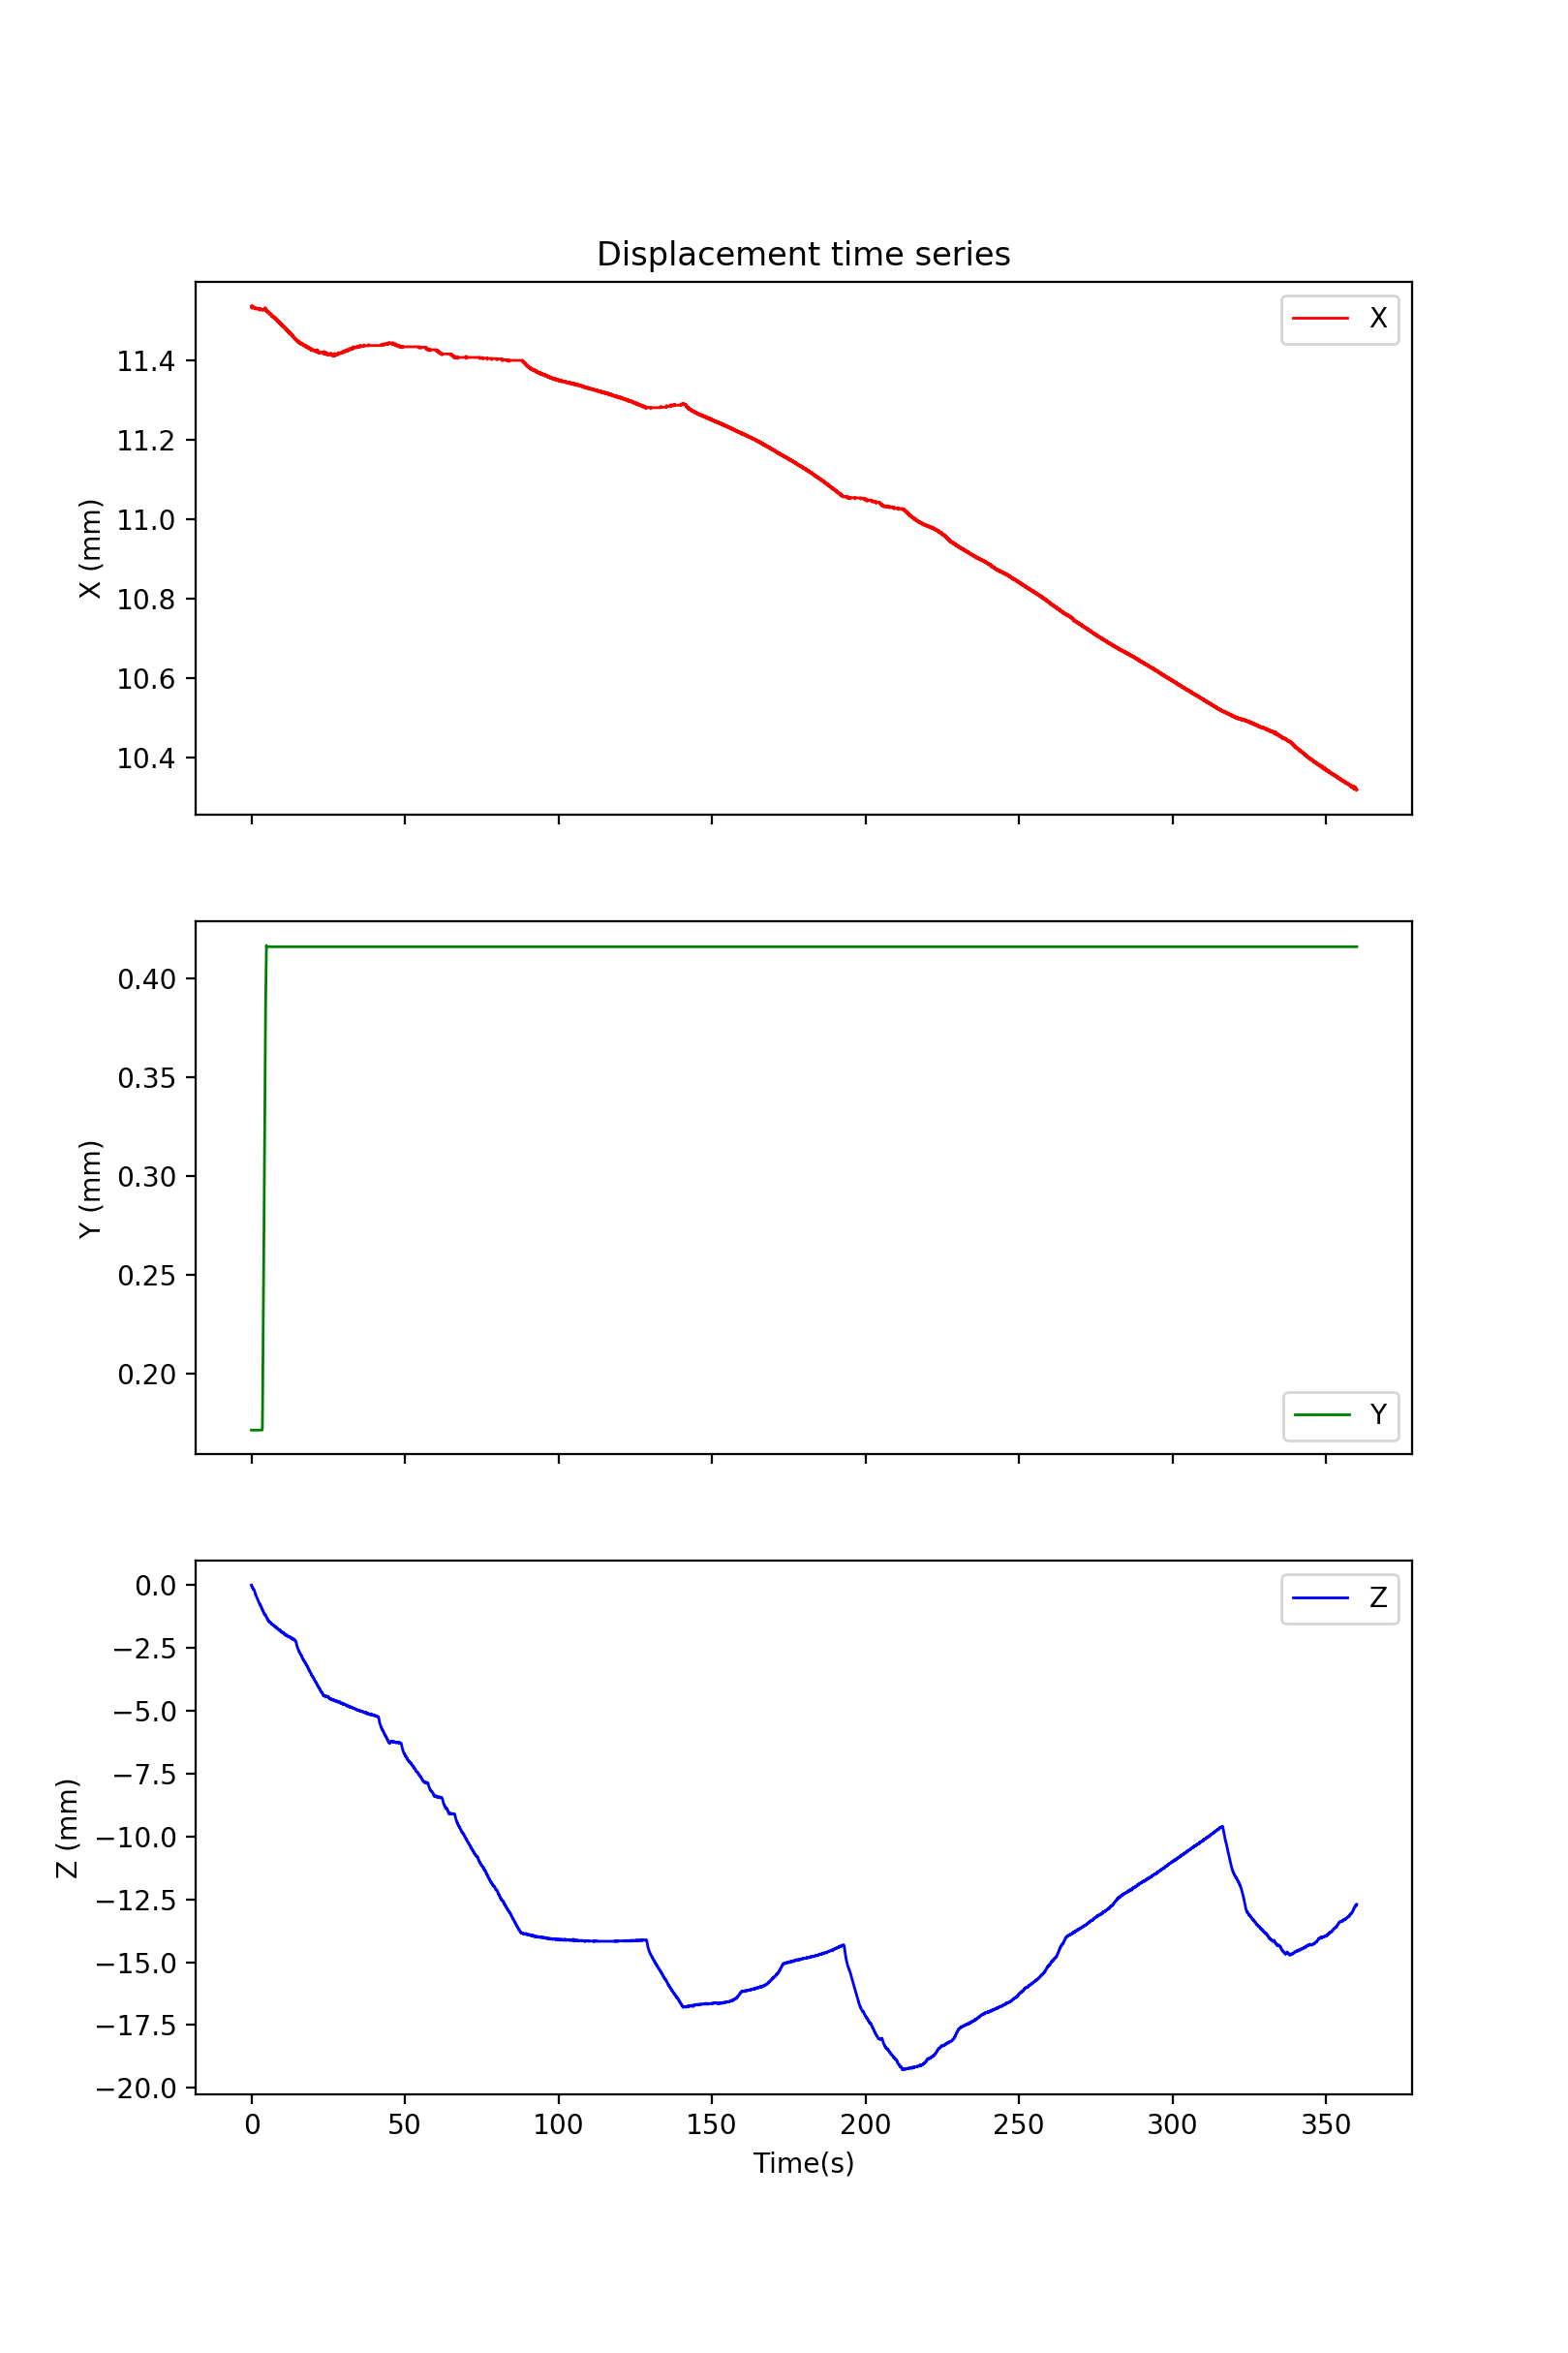

<IPython.core.display.Javascript object>


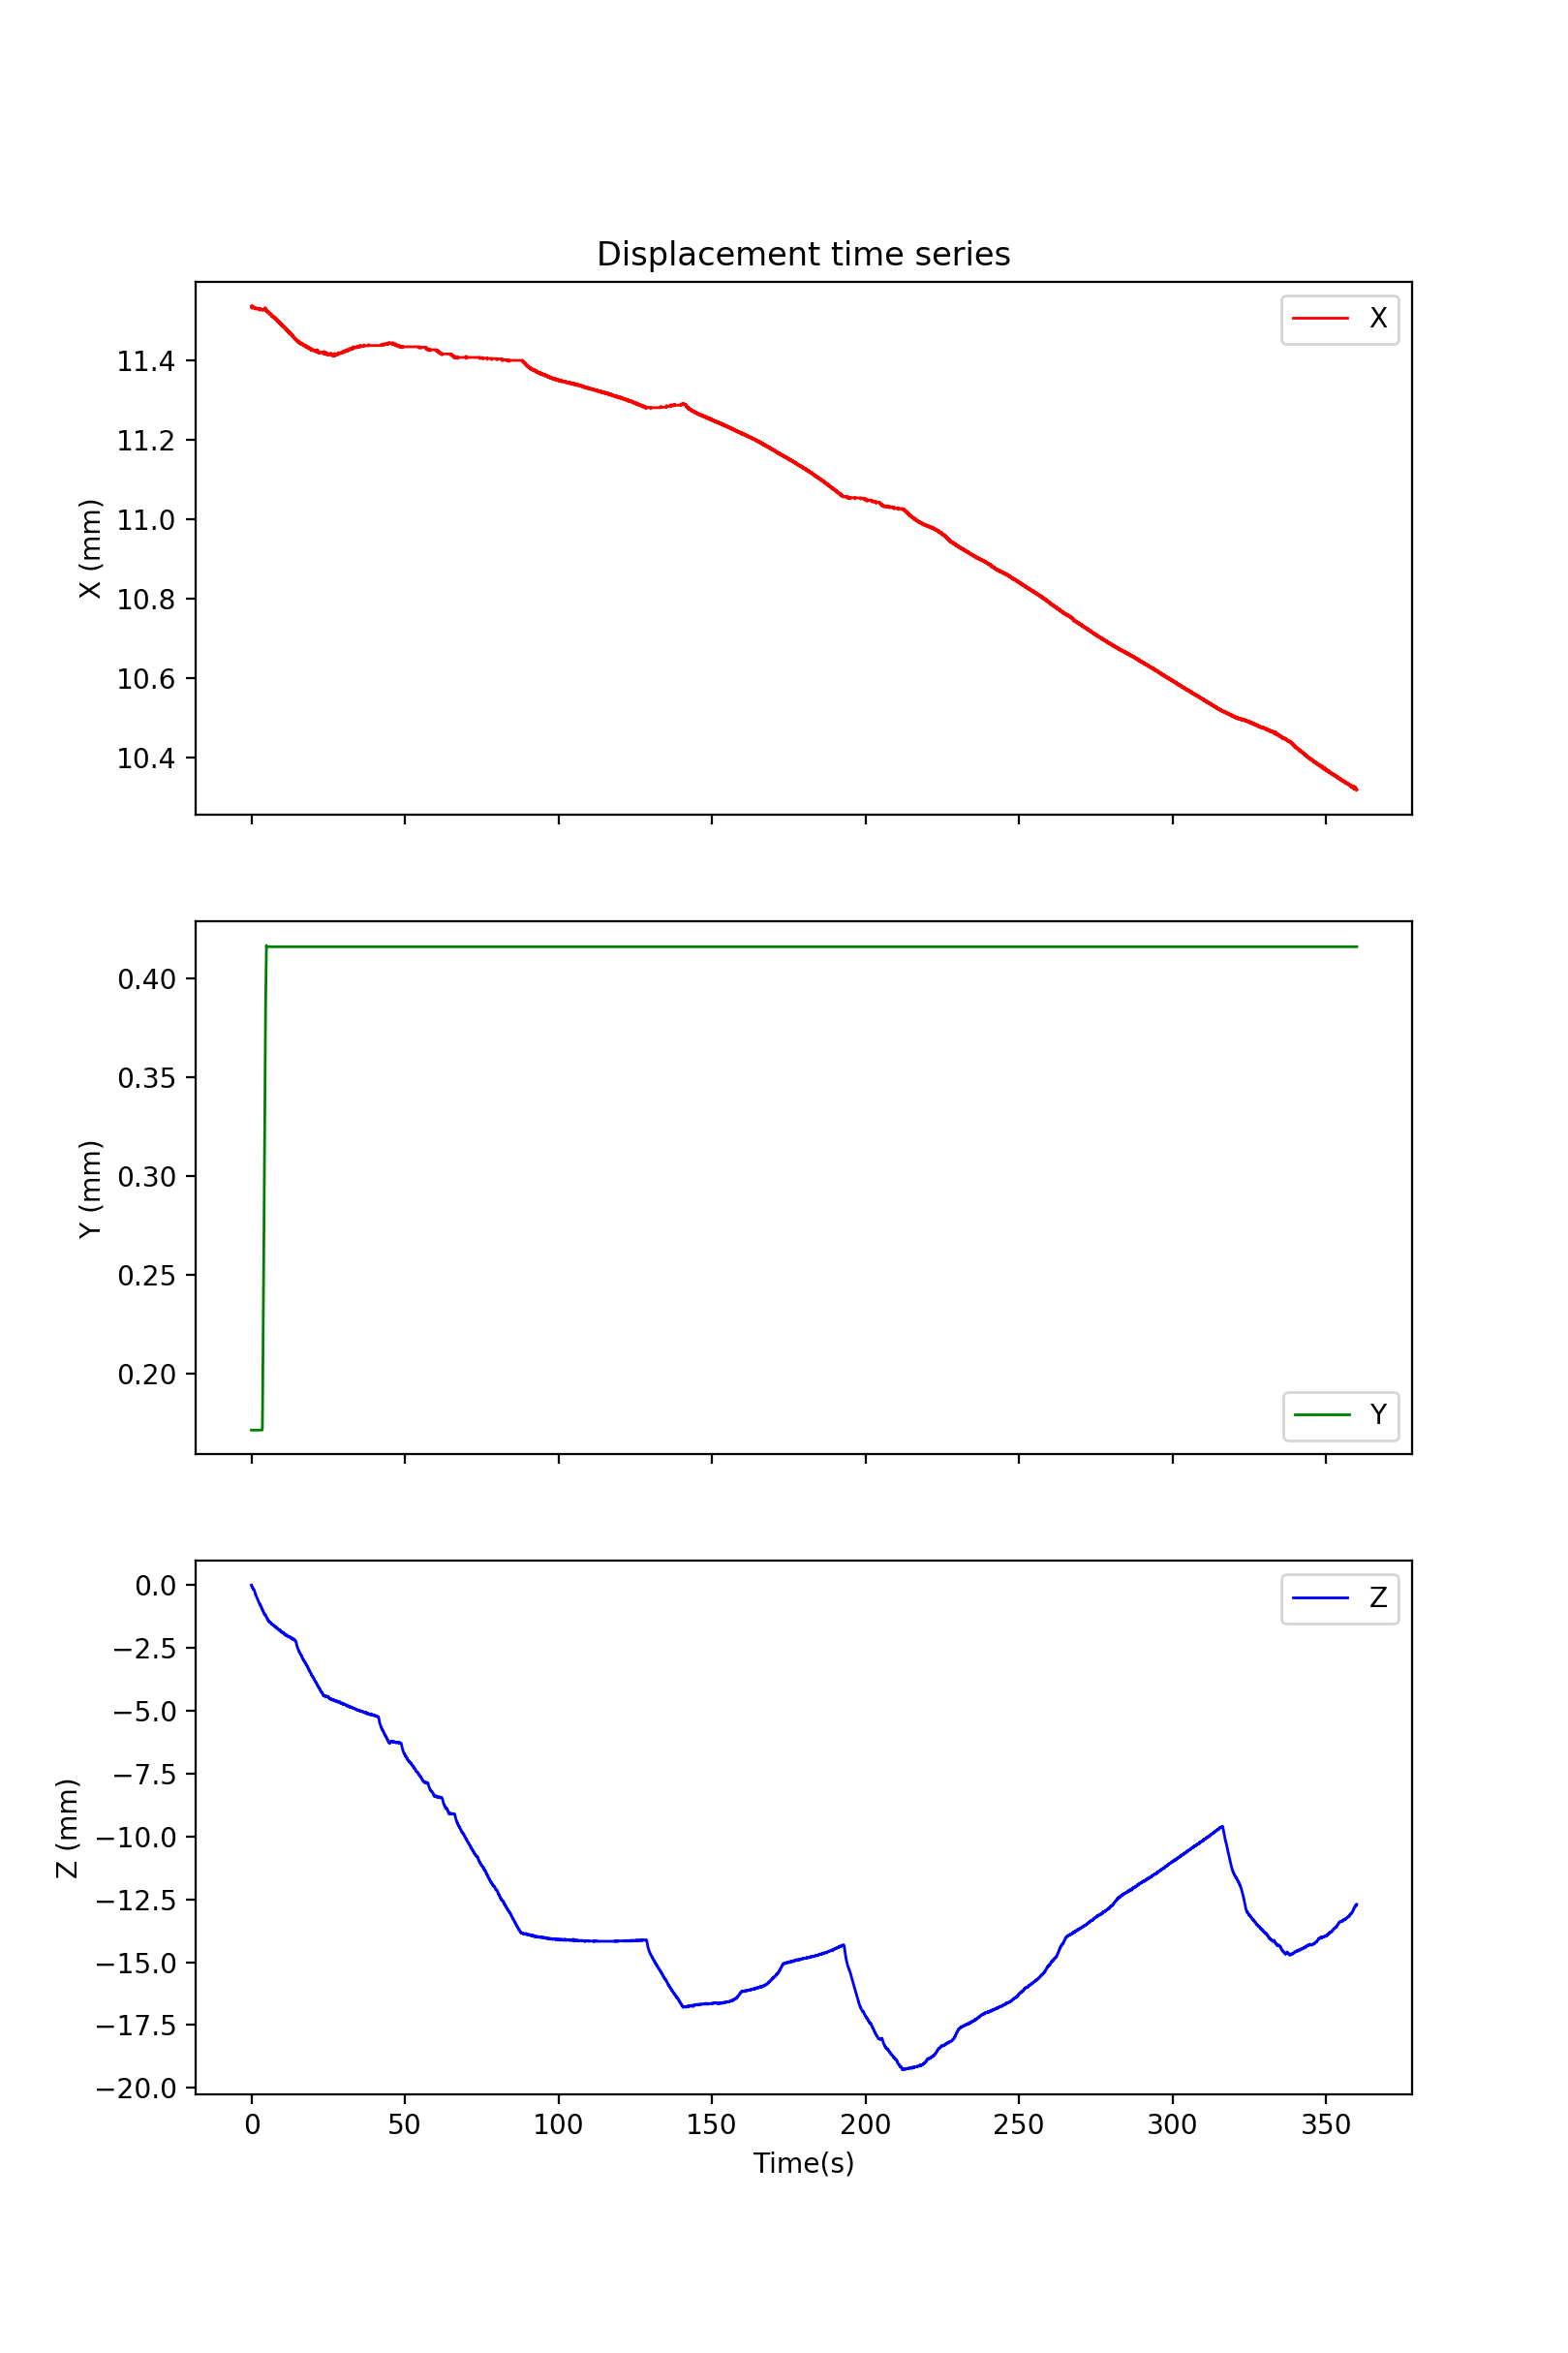

Saved Displacement time series.png to disk
Saved Displacement time series.svg to disk


In [4]:
# The analysis API has a built-in function to generate X, Y, Z displacement plots
gm_analysis.plot_displacement_timeseries()

# To save the plots to file, do the following
gm_analysis.plot_displacement_timeseries(save = True)

## Compute the object's velocity

In [155]:
gm_analysis.compute_velocity()

## Apply a low-pass filter to the velocity data to filter out high-freq noise


In [156]:
window_size = 40
print('Window size: ',window_size)
gm_analysis.data['V_x'] = np.array(gm_analysis.data['V_x'].rolling(window = window_size, min_periods=1, center = True).mean())
gm_analysis.data['V_y'] = np.array(gm_analysis.data['V_y'].rolling(window = window_size, min_periods=1, center = True).mean())
gm_analysis.data['V_z'] = np.array(gm_analysis.data['V_z'].rolling(window = window_size, min_periods=1, center = True).mean())

print(gm_analysis.data['V_x'])

Window size:  40
0       -0.003412
1       -0.003249
2       -0.003102
3       -0.002967
4       -0.002843
           ...   
16007   -0.006276
16008   -0.006537
16009   -0.006821
16010   -0.007132
16011   -0.007471
Name: V_x, Length: 16012, dtype: float64


## Plot a time-series for the velocity

<IPython.core.display.Javascript object>


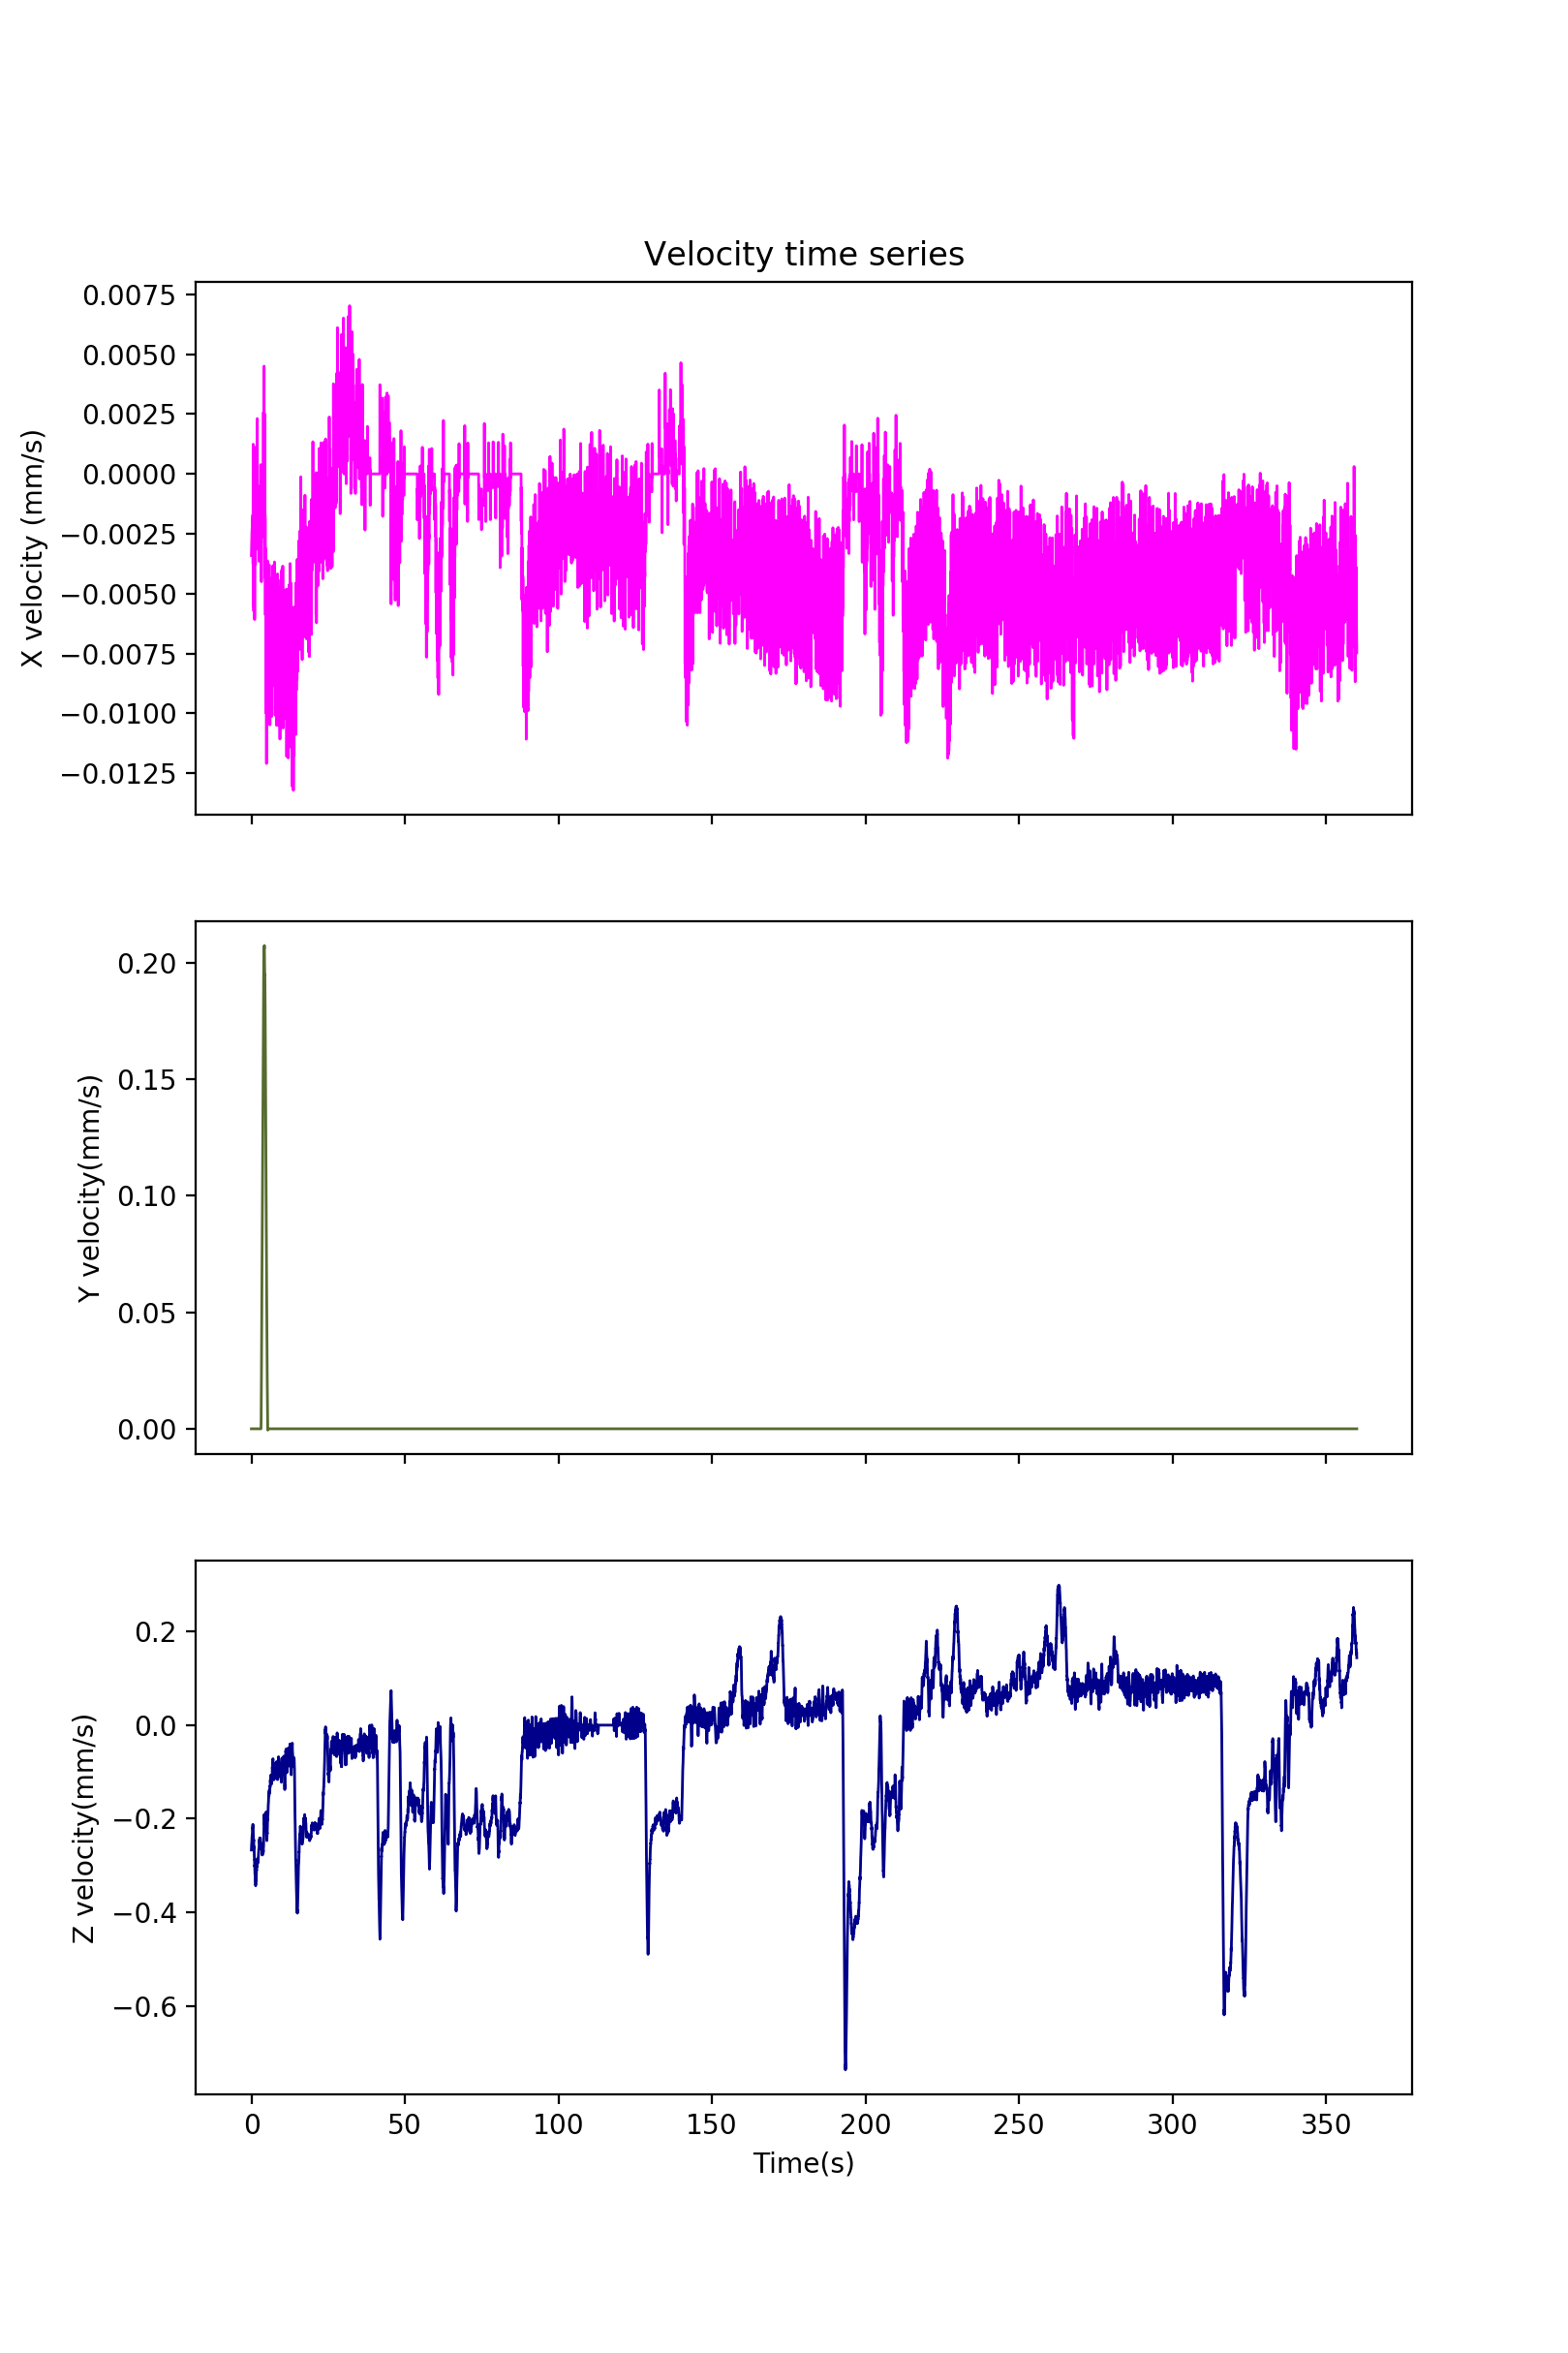

In [157]:
gm_analysis.plot_velocity_timeseries()

## Find the size of the object of interest

In [158]:
gm_analysis.find_object_size()

Color thresholds available! 
 Loading file D:\GravityMachine_2020\DiatomData_withv2codebase_forTesting\Centric_diatom_PurtoRico_2018\colorThresholds.pkl ...
Color thresholds for segmentation: 
 LOW: (0, 0, 69), HIGH : (255, 255, 255)
Loading organism size from memory ...
**************************************************
object diameter 0.15528175329706473 mm
object diameter max 0.15136040851568722 mm
object diameter min 0.15920309807844224 mm
**************************************************


## Running PIV on a pair of frames

--------------------------------------------------
Loading PIV data for: IMG_8000.tif and IMG_8001.tif 

--------------------------------------------------
0.05179317338155039


<IPython.core.display.Javascript object>


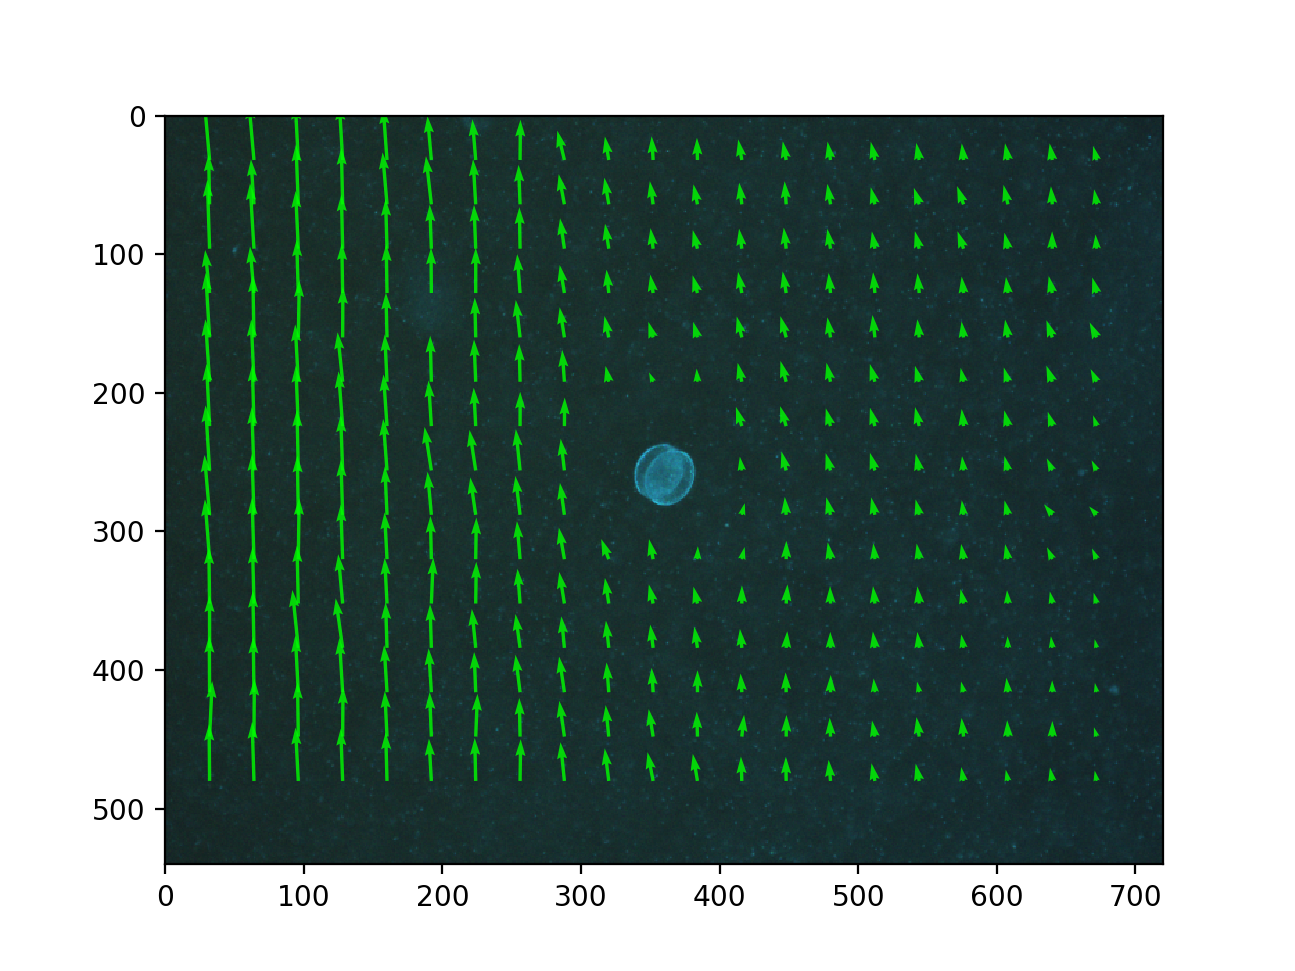

0.029884266974690352
0.02190890640686003


(0.029884266974690352,
 0.02190890640686003,
 0.0028886943966826666,
 0.010768361229206054)

In [159]:
image_a = 'IMG_8000.tif'
image_b = 'IMG_8001.tif'
gm_analysis.initialize_piv_analysis()
gm_analysis.compute_background_fluid_velocity(image_a, image_b)

## Running PIV analysis to compute the object's velocity and displacement relative to the fluid

In [50]:
gm_analysis.compute_fluid_velocity_timeseries()

Fluid time series found! Loading ...


## Compute the corrected displacement of the object relative to the fluid

In [163]:
gm_analysis.compute_fluid_relative_disp(overwrite_flag = False, save = True)

Fluid time series found! Loading ...


<IPython.core.display.Javascript object>


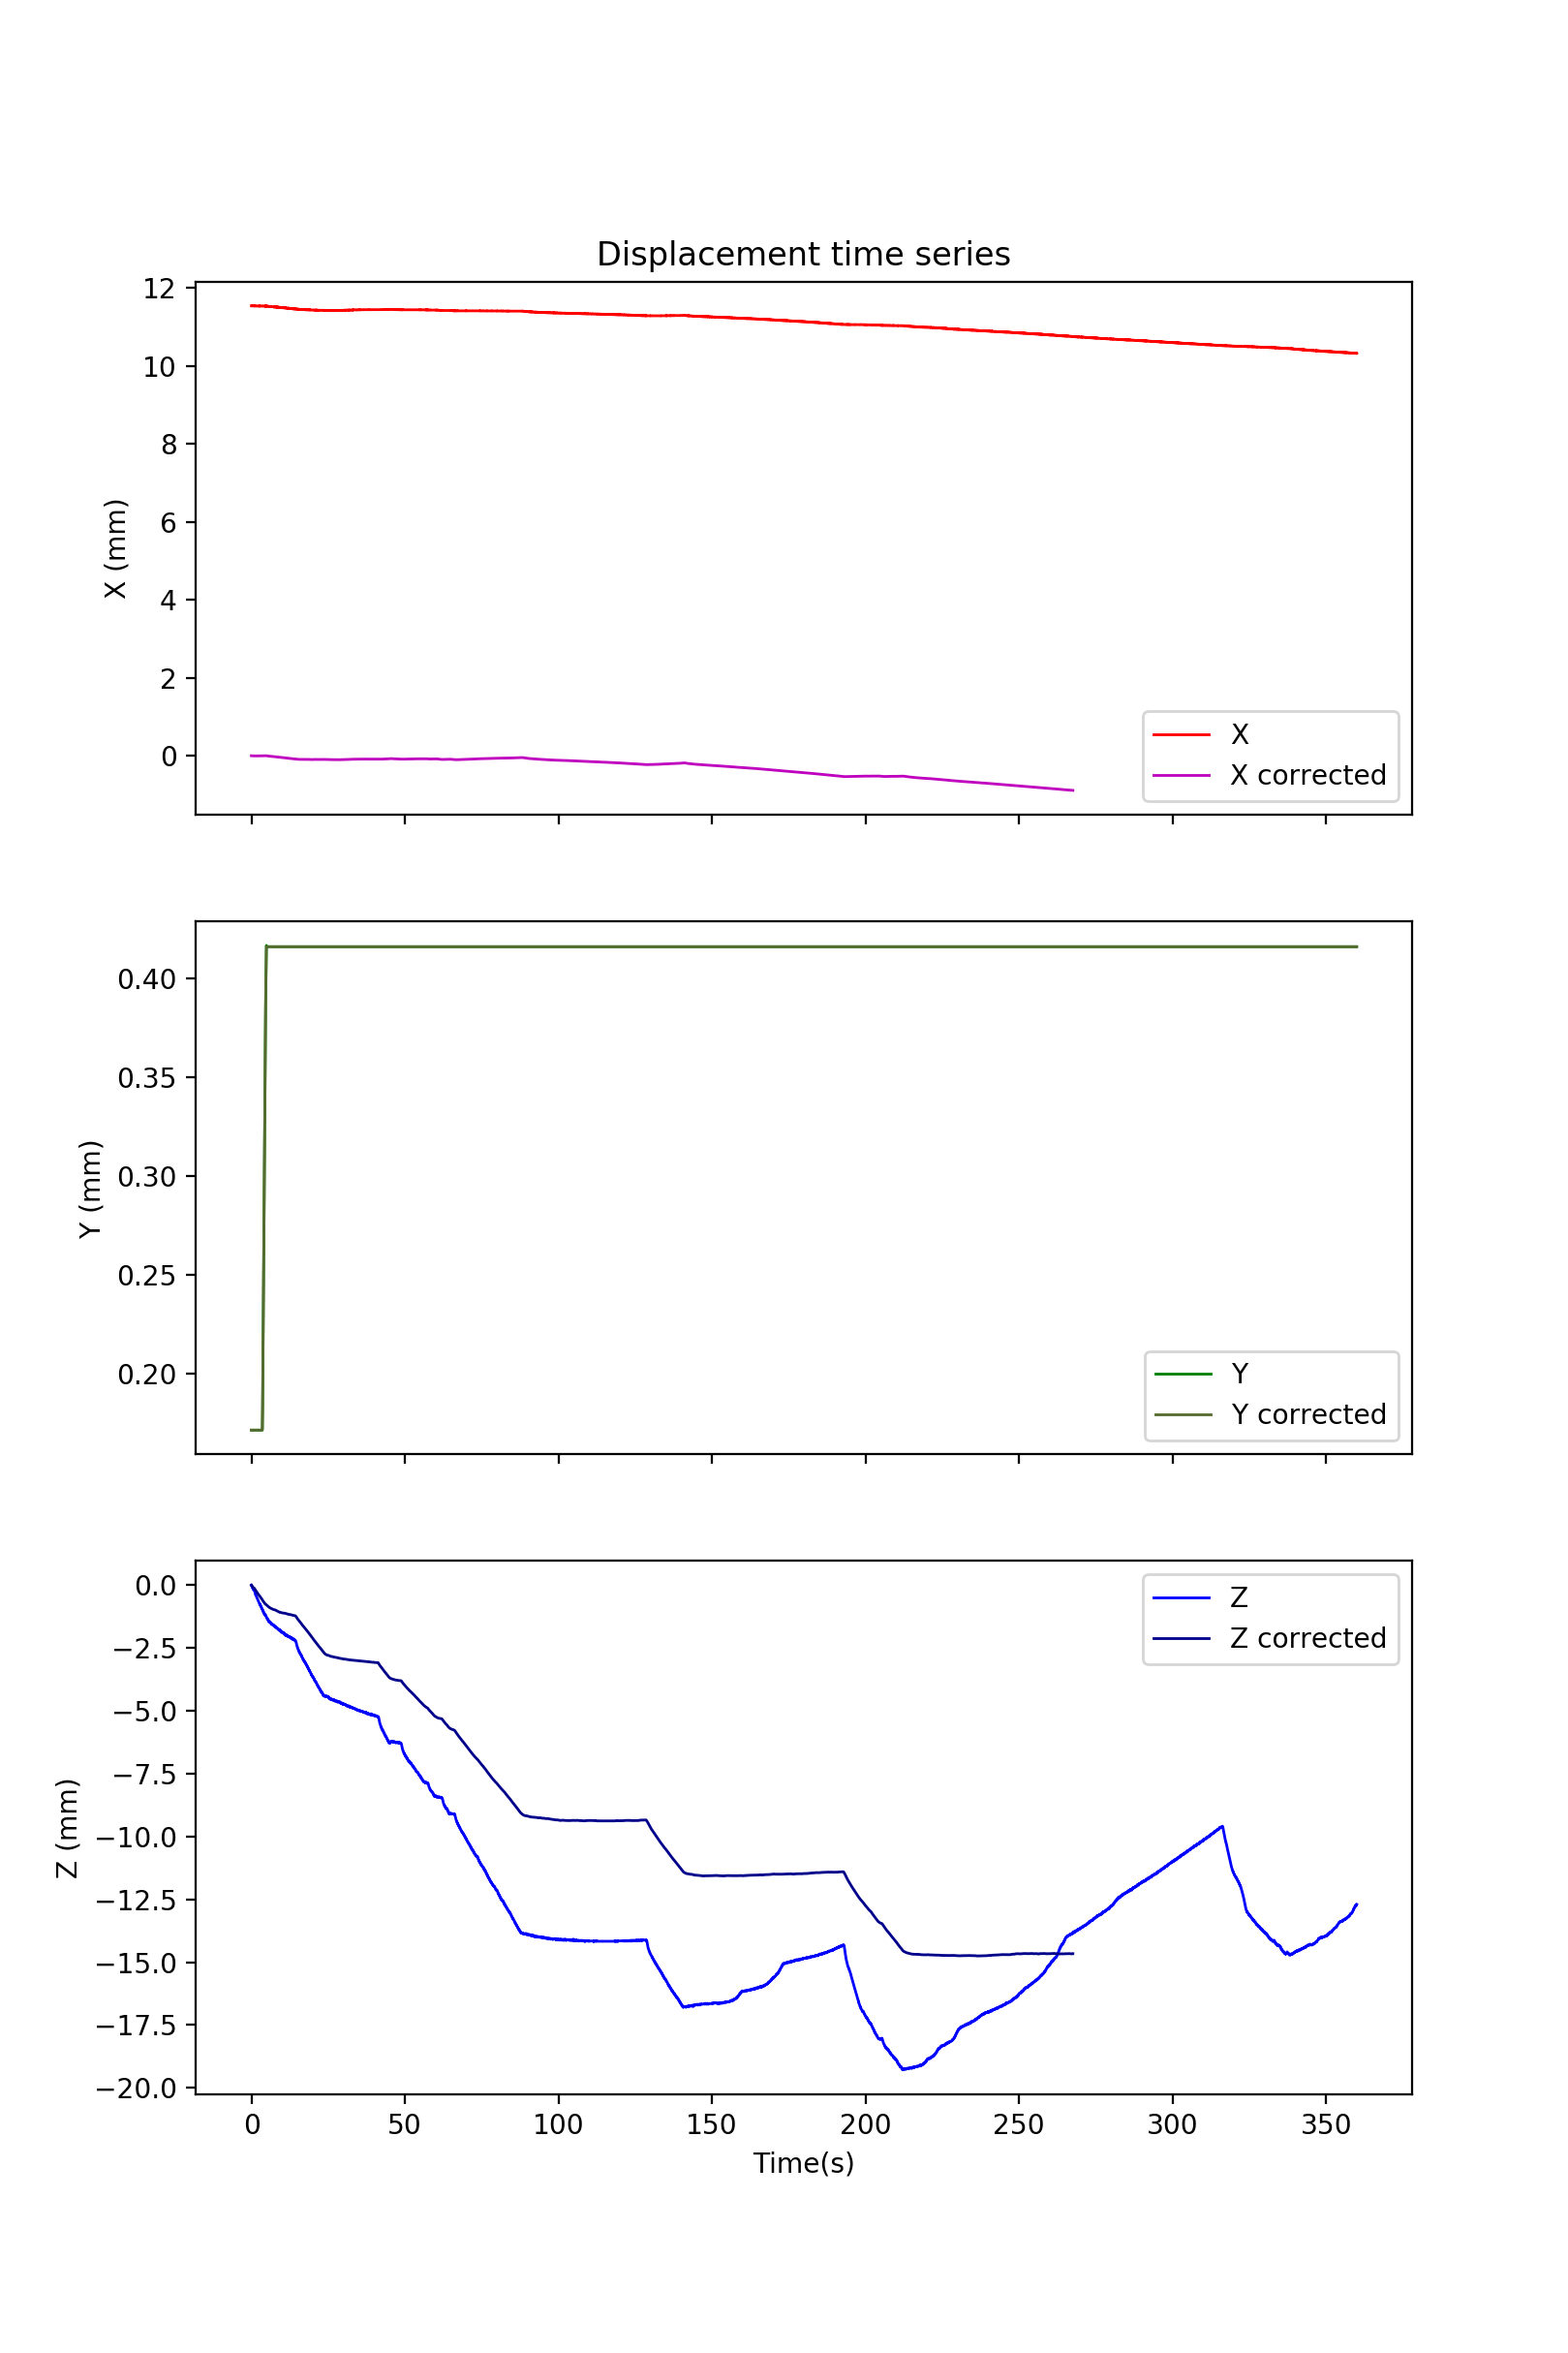

In [165]:
## Plot the raw and corrected displacements
units = {'Time':'(s)', 'X':'(mm)','Y':'(mm)','Z':'(mm)', 'V_x': '(mm/s)','V_y': '(mm/s)','V_z': '(mm/s)', 'Theta':'(rad)'}

import seaborn as sns

title = 'Displacement time series'
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize = (8,12))
ax1.set_title(title)
sns.lineplot(x = gm_analysis.data['Time'], y = gm_analysis.data['X'], color = 'r', linewidth = 1, label = 'X', ax = ax1, ci = None)
sns.lineplot(x = gm_analysis.derived_data['Time'], y = gm_analysis.derived_data['X'], color = 'm', linewidth = 1, label = 'X corrected', ax = ax1, ci = None)
ax1.set_ylabel('X '+units['X'])
sns.lineplot(x = gm_analysis.data['Time'], y = gm_analysis.data['Y'], color = 'g', linewidth = 1, label = 'Y', ax = ax2, ci = None)
sns.lineplot(x = gm_analysis.derived_data['Time'], y = gm_analysis.derived_data['Y'], color = 'darkolivegreen', linewidth = 1, label = 'Y corrected', ax = ax2, ci = None)
ax2.set_ylabel('Y '+units['Y'])
sns.lineplot(x = gm_analysis.data['Time'], y = gm_analysis.data['Z'], color = 'b', linewidth = 1, label = 'Z', ax = ax3, ci = None)
sns.lineplot(x = gm_analysis.derived_data['Time'], y = gm_analysis.derived_data['Z'], color = 'darkblue', linewidth = 1, label = 'Z corrected', ax = ax3, ci = None)

ax3.set_ylabel('Z '+units['Z'])
ax3.set_xlabel('Time' + units['Time'])
plt.show()

0      -617.378436
1      -617.388858
2      -617.385674
3      -617.399281
4      -617.396096
           ...    
2660   -625.784499
2661   -625.784499
2662   -625.774088
2663   -625.770903
2664   -625.781314
Name: Z, Length: 2665, dtype: float64


0         0.000000
1         0.100324
2         0.169596
3         0.265820
4         0.344847
           ...    
2660    239.518380
2661    239.614484
2662    239.696903
2663    239.812107
2664    239.897554
Name: Time, Length: 2665, dtype: float64

10
9
8
7
6
5
4
3
2
1
